In [1]:
from rlway.pyosrd import OSRD
sim = OSRD(use_case='cvg_dvg', dir='cvg_dvg')

[10:00:18,226] [DEBUG]             [Allowance] computing range n°1
[10:00:18,244] [DEBUG]             [Allowance]   computing section n°1
[10:00:18,246] [DEBUG]             [Allowance]   target time = 125.68289999999999
[10:00:18,247] [DEBUG]             [Allowance]     starting attempt 1
[10:00:18,260] [DEBUG]             [Allowance]     envelope time 183.259
[10:00:18,261] [DEBUG]             [Allowance]     starting attempt 2
[10:00:18,262] [DEBUG]             [Allowance]     envelope time 144.777
[10:00:18,263] [DEBUG]             [Allowance]     starting attempt 3
[10:00:18,264] [DEBUG]             [Allowance]     envelope time 131.011
[10:00:18,265] [DEBUG]             [Allowance]     starting attempt 4
[10:00:18,266] [DEBUG]             [Allowance]     envelope time 125.086
[10:00:18,292] [DEBUG]             [Allowance] computing range n°1
[10:00:18,293] [DEBUG]             [Allowance]   computing section n°1
[10:00:18,294] [DEBUG]             [Allowance]   target time = 125.682

<Axes: title={'center': 'train1 (eco)'}, xlabel='Time [min]'>

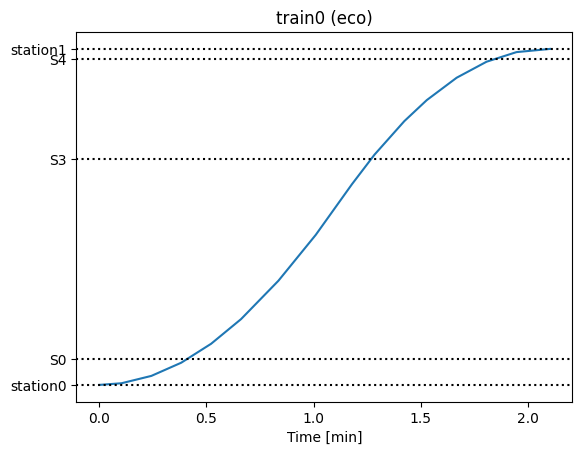

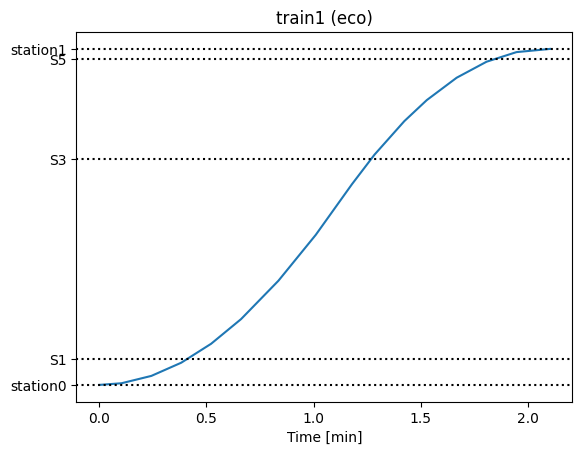

In [10]:
sim.space_time_graph(0, types_to_show=['station', 'signal', 'cvg_signal'])
sim.space_time_graph(1, types_to_show=['station', 'signal', 'cvg_signal'])

In [4]:
sim.points_encountered_by_train(0),
sim.points_encountered_by_train(1)

[{'id': 'station0',
  'type': 'station',
  'offset': 300.0,
  't_min': 0.0,
  't': 0.0},
 {'id': 'S1',
  'type': 'cvg_signal',
  'offset': 430.0,
  't_min': 23.602228349891345,
  't': 24.67246908935413},
 {'id': 'D1',
  'type': 'detector',
  'offset': 450.0,
  't_min': 25.290046462376335,
  't': 26.436821149312472},
 {'id': 'S3',
  'type': 'signal',
  'offset': 1430.0,
  't_min': 72.84231060271264,
  't': 76.14533806299838},
 {'id': 'D3',
  'type': 'detector',
  'offset': 1450.0,
  't_min': 73.65863713332489,
  't': 76.99868084041638},
 {'id': 'S5',
  'type': 'signal',
  'offset': 1930.0,
  't_min': 106.03278679318883,
  't': 110.84083315485213},
 {'id': 'D5',
  'type': 'detector',
  'offset': 1950.0,
  't_min': 109.36612012652218,
  't': 114.32531616264231},
 {'id': 'station1',
  'type': 'station',
  'offset': 1980.0,
  't_min': 120.6994534598555,
  't': 126.1272134867919}]

In [5]:
import networkx as nx

G = nx.Graph([(0, 1), (0, 2), (1, 2)])
H = nx.Graph([(0, 3), (1, 2), (2, 3)])
R = nx.intersection(G, H)

EdgeView([(1, 2)])

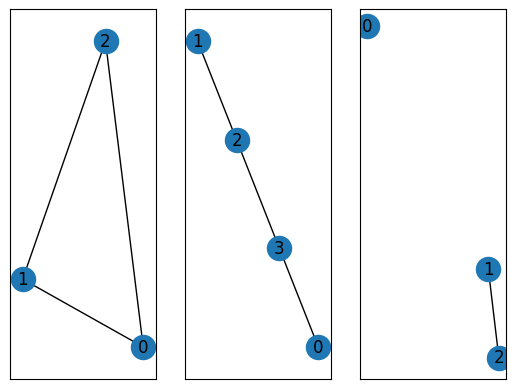

In [7]:
import matplotlib.pyplot as plt

plt.subplot(1, 3, 1)
nx.draw_networkx(G)
plt.subplot(1, 3, 2)
nx.draw_networkx(H)
plt.subplot(1, 3, 3)
nx.draw_networkx(R)

In [38]:
import plotly.express as px

train = 0
eco_or_base = 'eco'
simulation = eco_or_base+'_simulations'
records = \
    sim.results[train][simulation][0]['head_positions']
offset = records[0]['offset']
offsets = [offset + t['path_offset'] for t in records]
times = [t['time']/60 for t in records]

points = sim.points_encountered_by_train(
    train,
    types=['station', 'signal']
)


In [39]:
fig = px.line(x=times, y=offsets, template='simple_white', title='train 1 (eco)')

for point in points:
    fig.add_hline(
        y=point['offset'],
        line_width=.5,
        line_dash="dash",
        line_color="black"
    )

fig.update_layout(
    yaxis = dict(
        tickmode = 'array',
        tickvals = [point['offset'] for point in points],
        ticktext = [point['id'] for point in points]
    )
)

fig

In [40]:
sim.draw_infra()

In [41]:
sim.train_track_sections(0)

['T1', 'T2', 'T3', 'T5']

In [43]:
sim.train_track_sections(1)

['T1', 'T2', 'T3', 'T5']